<a href="https://colab.research.google.com/github/Richard-Santosp/Analise-_de_Cancelamento_de_Clientes/blob/main/Arquivo_Inicial_Minicurso_Analise_de_Dados_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio:

Você trabalha em uma grande empresa de Cartão de Crédito e o diretor da empresa percebeu que o número de clientes que cancelam seus cartões tem aumentado significativamente, causando prejuízos enormes para a empresa

O que fazer para evitar isso? Como saber as pessoas que têm maior tendência a cancelar o cartão?

# O que temos:

Temos 1 base de dados com informações dos clientes, tanto clientes atuais quanto clientes que cancelaram o cartão

Download da Base de Dados: Botão na página

Referência: https://www.kaggle.com/sakshigoyal7/credit-card-customers

 - Passo 1:  importar a base de dados
 - Passo 2: visualizar e tratar a base de dados.
 - Passo 3: Visualizar os dados
 - Passo 4: Construi uma anallise para identificar o motivo do cancelamento
  - Identificar o motivo ou principais motivos dos cliente estarem cancelando o cartão de credito.

In [ ]:
import pandas as pd

tabela = pd.read_csv("/content/drive/MyDrive/Analise de dados hashtag/ClientesBanco.csv", encoding="latin1")
tabela = tabela.drop("CLIENTNUM", axis=1)
display(tabela)

,Categoria,Idade,Sexo,Dependentes,Educação,Estado Civil,Faixa Salarial Anual,Categoria Cartão,Meses como Cliente,Produtos Contratados,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
0,Cliente,45,M,3,Ensino Médio,Casado,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1335.000,1144,42,1625.000,0.061
1,Cliente,49,F,5,Ensino Superior,Solteiro,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1541.000,1291,33,3714.000,0.105
2,Cliente,51,M,3,Ensino Superior,Casado,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2594.000,1887,20,2333.000,0.000
3,Cliente,40,F,4,Ensino Médio,Não informado,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1405.000,1171,20,2333.000,0.760
4,Cliente,40,M,3,Sem ensino formal,Casado,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2175.000,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Cliente,50,M,2,Ensino Superior,Solteiro,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Cancelado,41,M,2,Não informado,Divorciado,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Cancelado,44,F,1,Ensino Médio,Casado,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Cancelado,30,M,2,Ensino Superior,Não informado,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


# Agora vamos tratar valores vazios e exibir um resumo das colunas da base de dados

In [ ]:
tabela = tabela.dropna()
display(tabela.info())

display(tabela.describe().round(1))

<class 'pandas.core.frame.DataFrame'>
Index: 10126 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Categoria                      10126 non-null  object 
 1   Idade                          10126 non-null  int64  
 2   Sexo                           10126 non-null  object 
 3   Dependentes                    10126 non-null  int64  
 4   Educação                       10126 non-null  object 
 5   Estado Civil                   10126 non-null  object 
 6   Faixa Salarial Anual           10126 non-null  object 
 7   Categoria Cartão               10126 non-null  object 
 8   Meses como Cliente             10126 non-null  int64  
 9   Produtos Contratados           10126 non-null  int64  
 10  Inatividade 12m                10126 non-null  int64  
 11  Contatos 12m                   10126 non-null  int64  
 12  Limite                         10126 non-null  floa

None

,Idade,Dependentes,Meses como Cliente,Produtos Contratados,Inatividade 12m,Contatos 12m,Limite,Limite Consumido,Limite Disponível,Mudanças Transacoes_Q4_Q1,Valor Transacoes 12m,Qtde Transacoes 12m,Mudança Qtde Transações_Q4_Q1,Taxa de Utilização Cartão
count,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0,10126.0
mean,46.3,2.3,35.9,3.8,2.3,2.5,8632.0,1162.8,7469.2,108.7,4404.4,64.9,66.6,0.3
std,8.0,1.3,8.0,1.6,1.0,1.1,9089.2,815.0,9091.1,353.9,3397.2,23.5,284.0,0.3
min,26.0,0.0,13.0,1.0,0.0,0.0,1438.3,0.0,3.0,0.0,510.0,10.0,0.0,0.0
25%,41.0,1.0,31.0,3.0,2.0,2.0,2555.0,358.0,1324.2,0.6,2156.0,45.0,0.6,0.0
50%,46.0,2.0,36.0,4.0,2.0,2.0,4549.0,1276.0,3473.0,0.7,3899.5,67.0,0.7,0.2
75%,52.0,3.0,40.0,5.0,3.0,3.0,11067.8,1784.0,9860.0,0.9,4741.0,81.0,0.8,0.5
max,73.0,5.0,56.0,6.0,6.0,6.0,34516.0,2517.0,34516.0,3397.0,18484.0,139.0,3714.0,1.0


# Vamos avaliar como está a divisão entre clientes x cancelados

In [ ]:
qtd_categoria = tabela["Categoria"].value_counts()
display(qtd_categoria)

qtd_categoria_perc = tabela["Categoria"].value_counts(normalize=True)
perc_clientes = qtd_categoria_perc.Cliente*100
perc_cancelados = qtd_categoria_perc.Cancelado*100
print(f'Porcentagem de clientes: {perc_clientes.round(1)}% \nPorcentagem de cancelados: {perc_cancelados.round(1)}%')

,count
Categoria,
Cliente,8499
Cancelado,1627


Porcentagem de clientes: 83.9% 
Porcentagem de cancelados: 16.1%


# Temos varias formas de descobrir o motivo  de cancelamento

 - Podemos olhar a comparação entra Clientes e Cancelados, para ver se está informação traz algum insight para a gente

In [ ]:
import plotly.express as px

for coluna in tabela:
  grafico = px.histogram(tabela, x=coluna, color="Categoria")
  grafico.show()

#grafico = px.histogram(tabela, x=tabela["Idade"], color="Categoria")
#grafico.show()

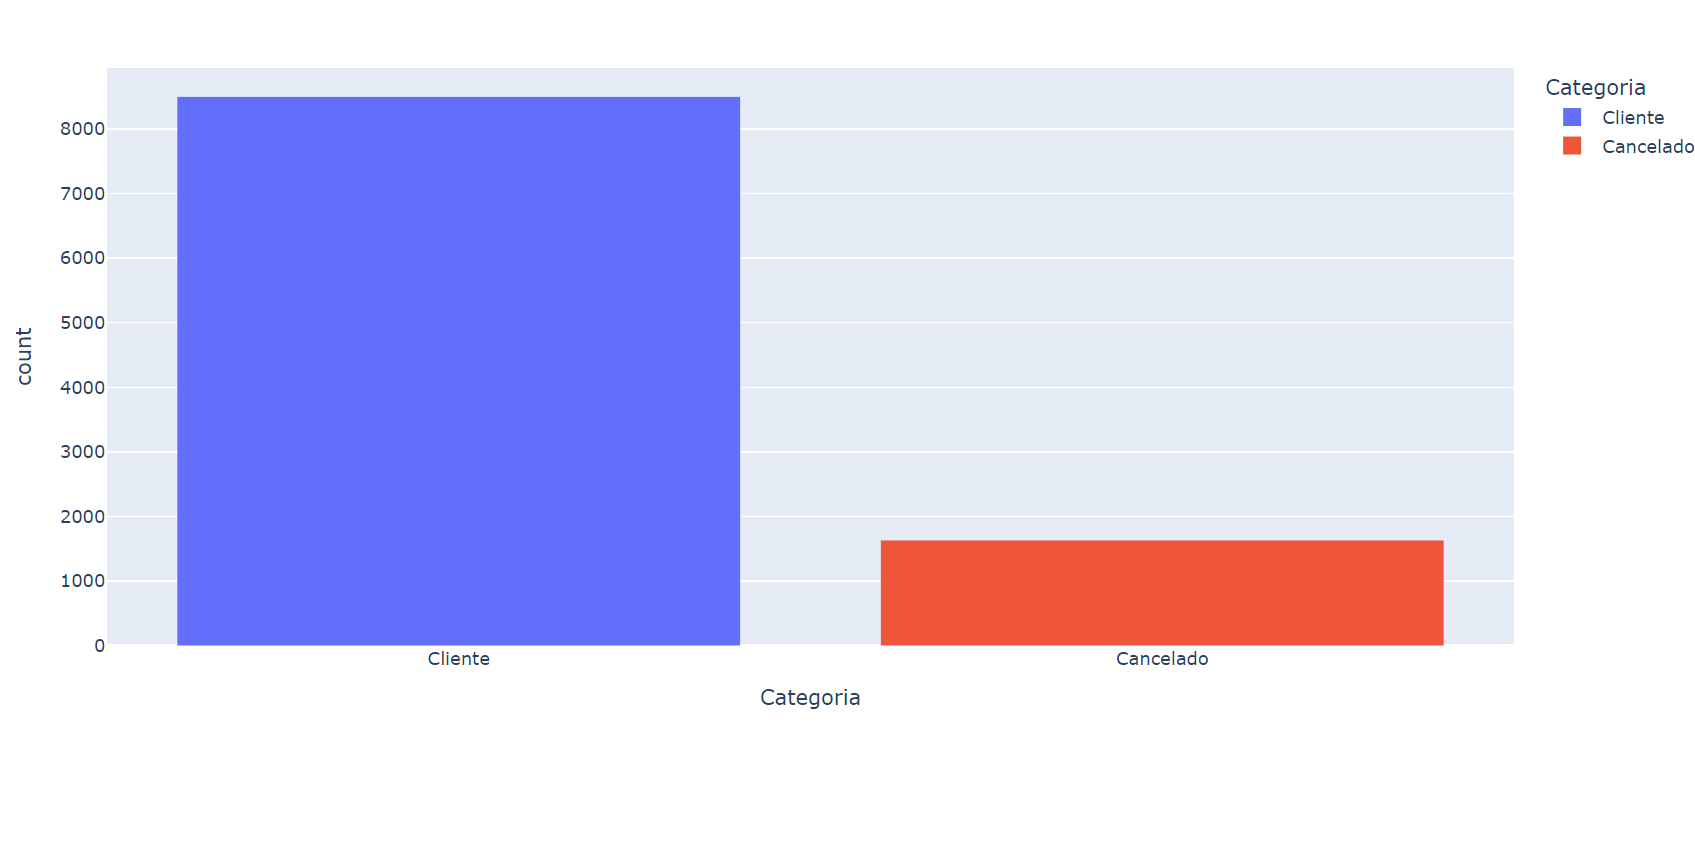

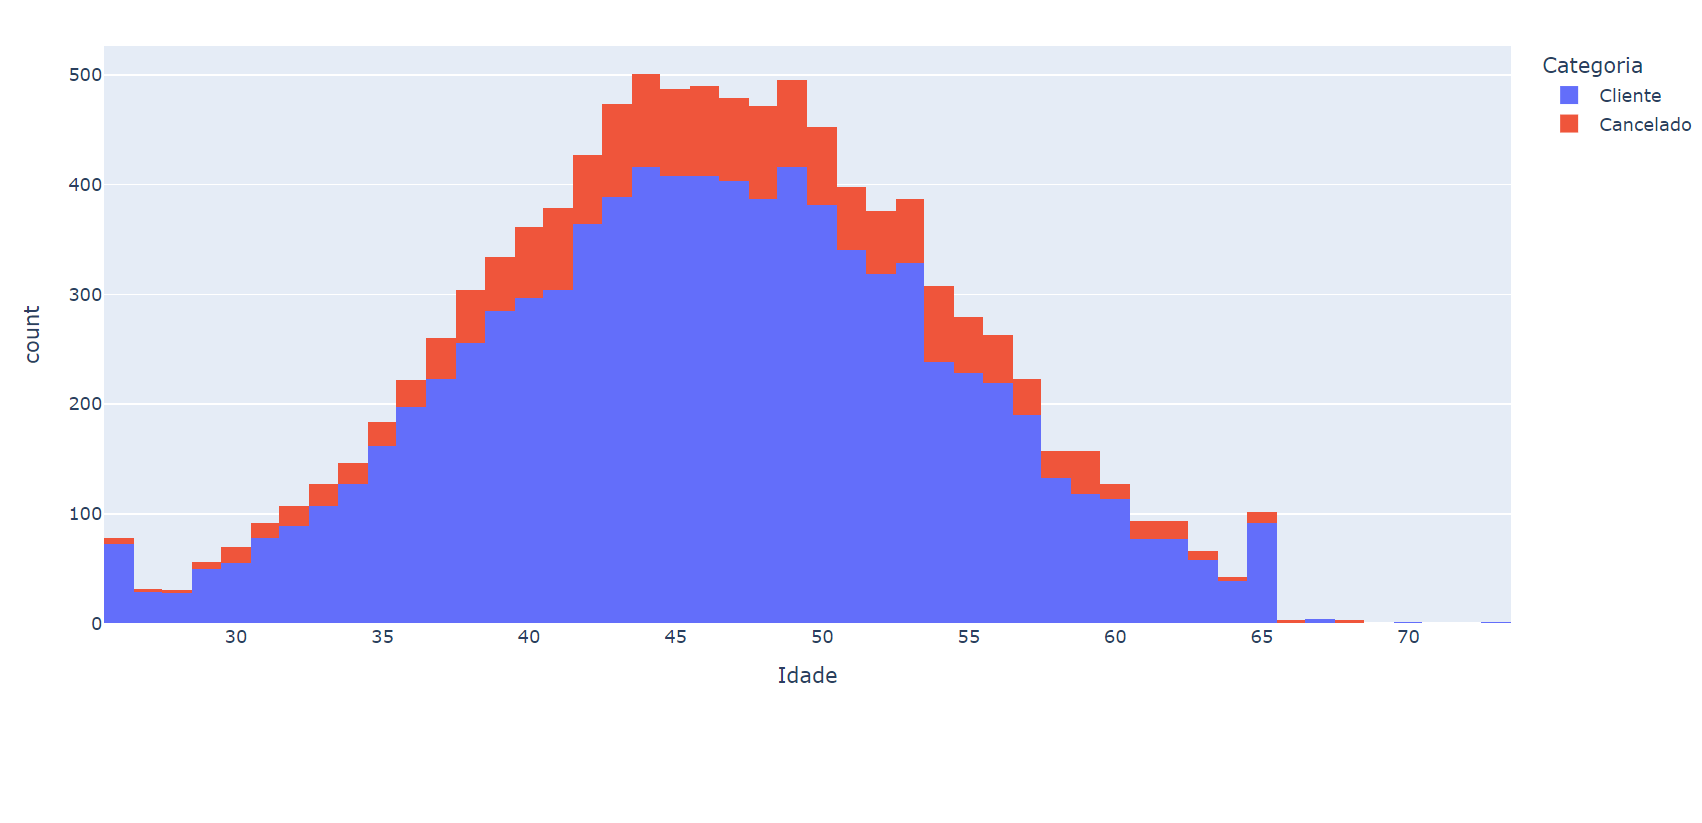

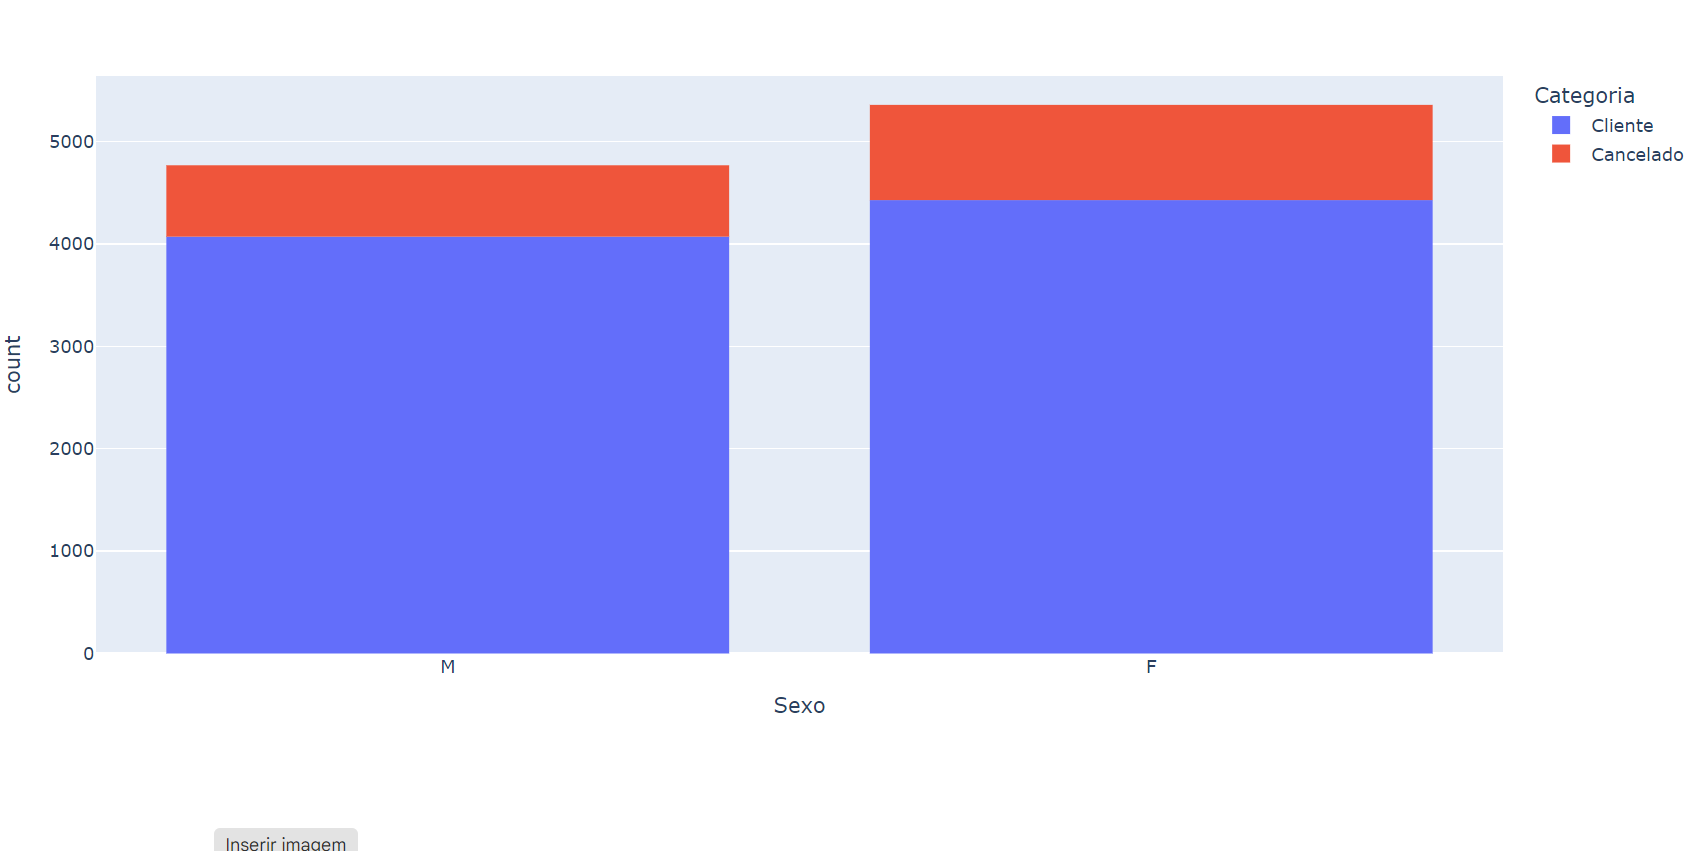

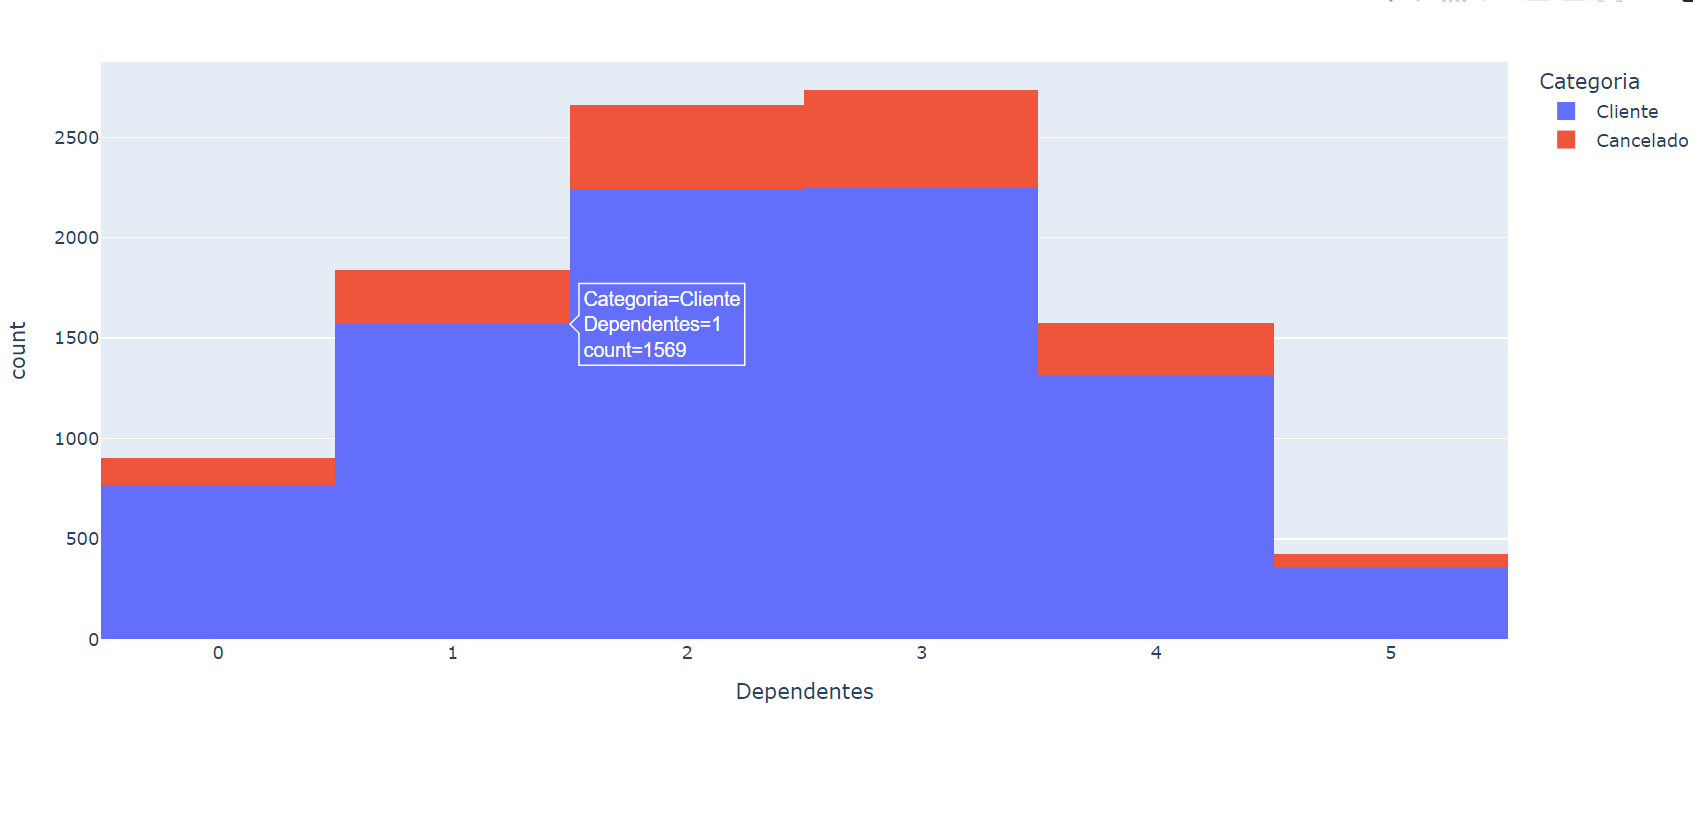

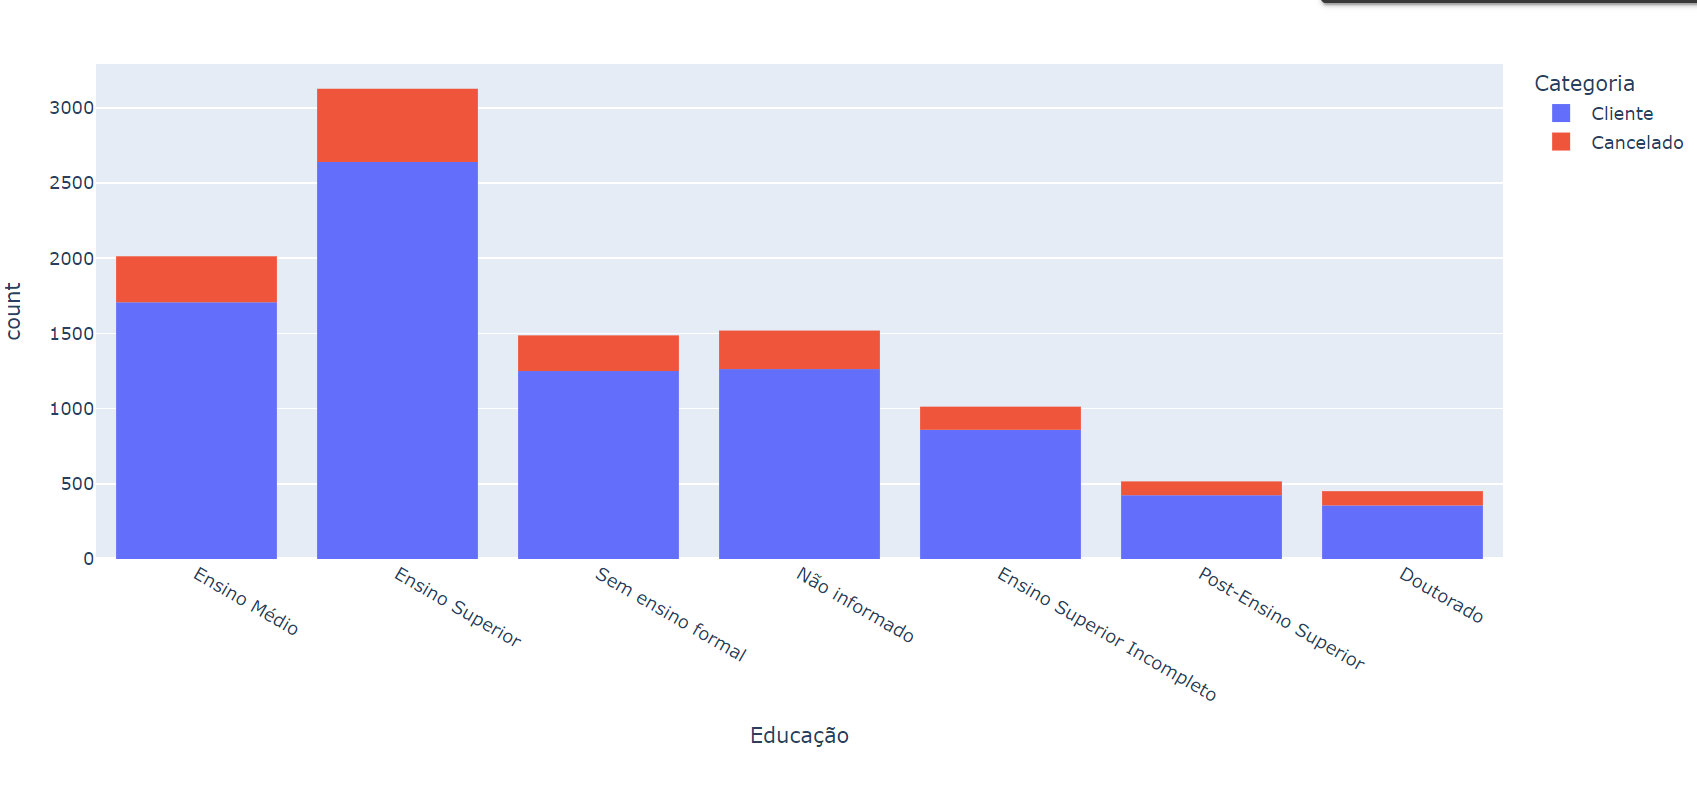

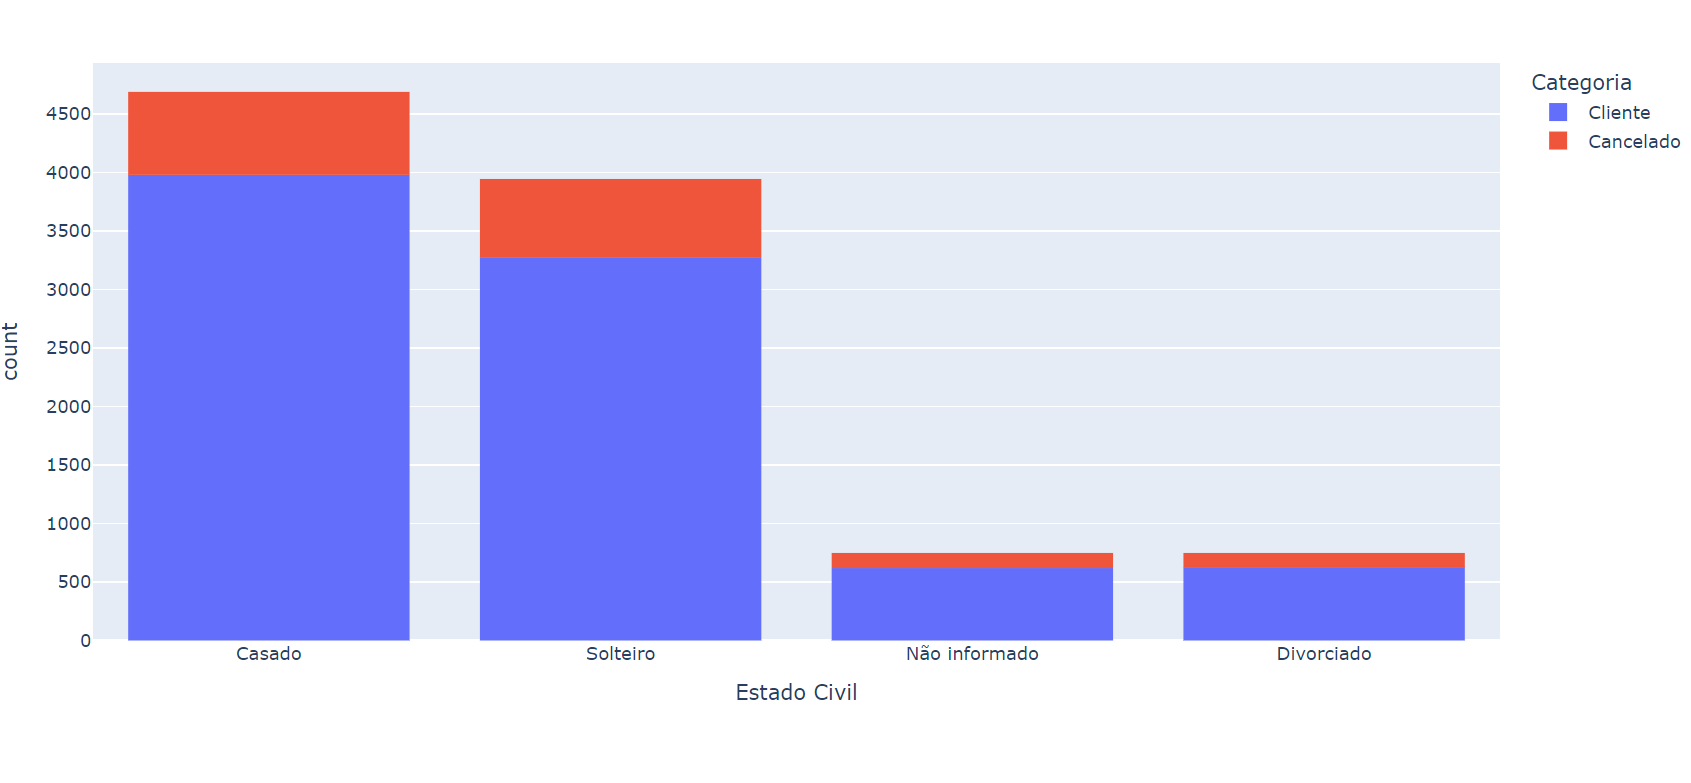

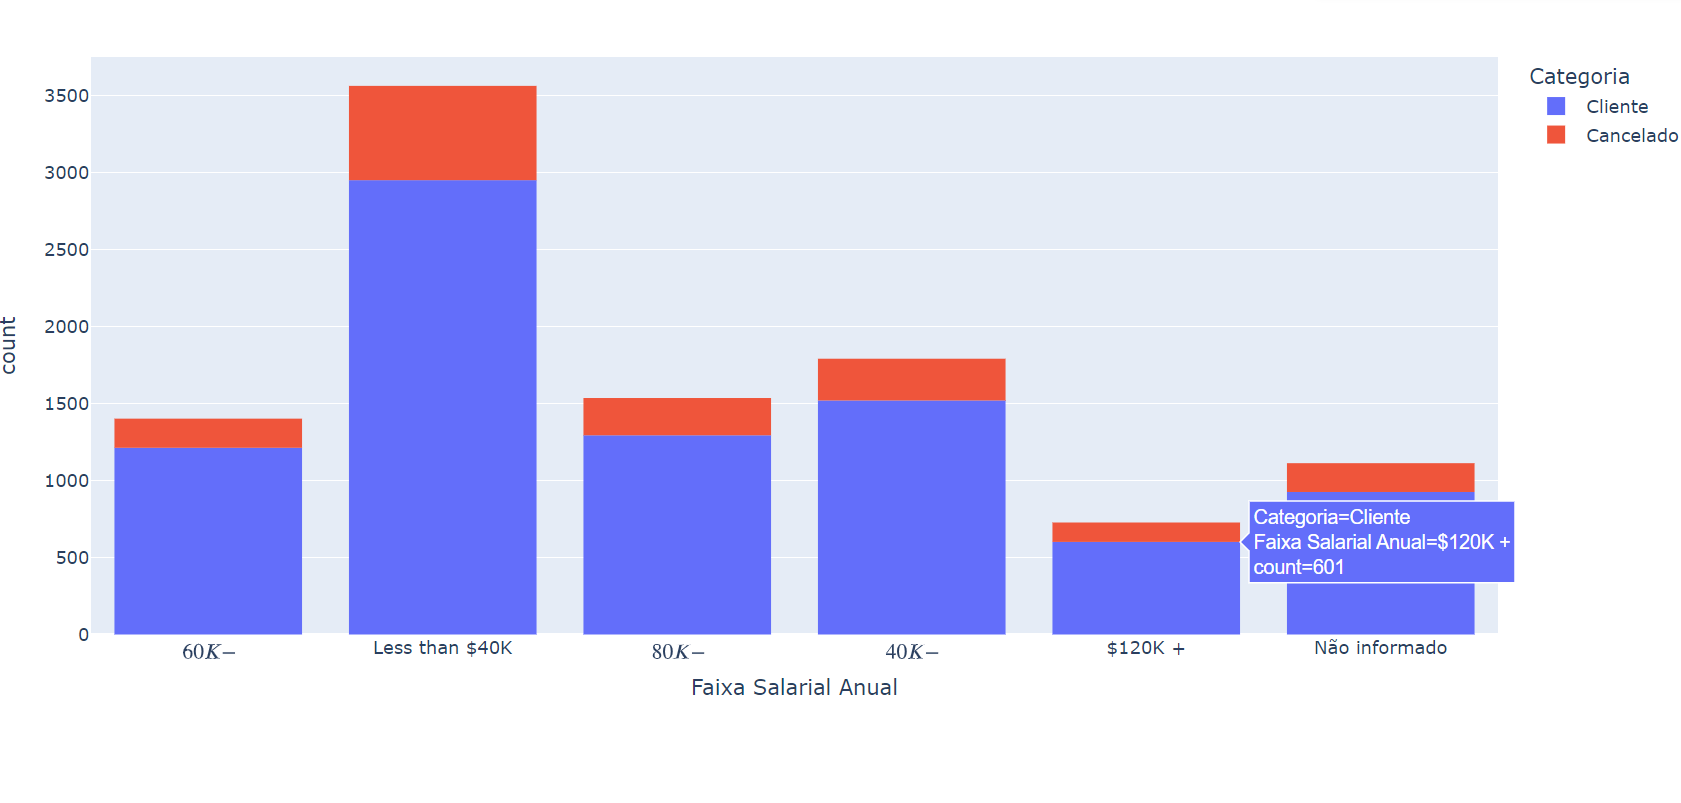

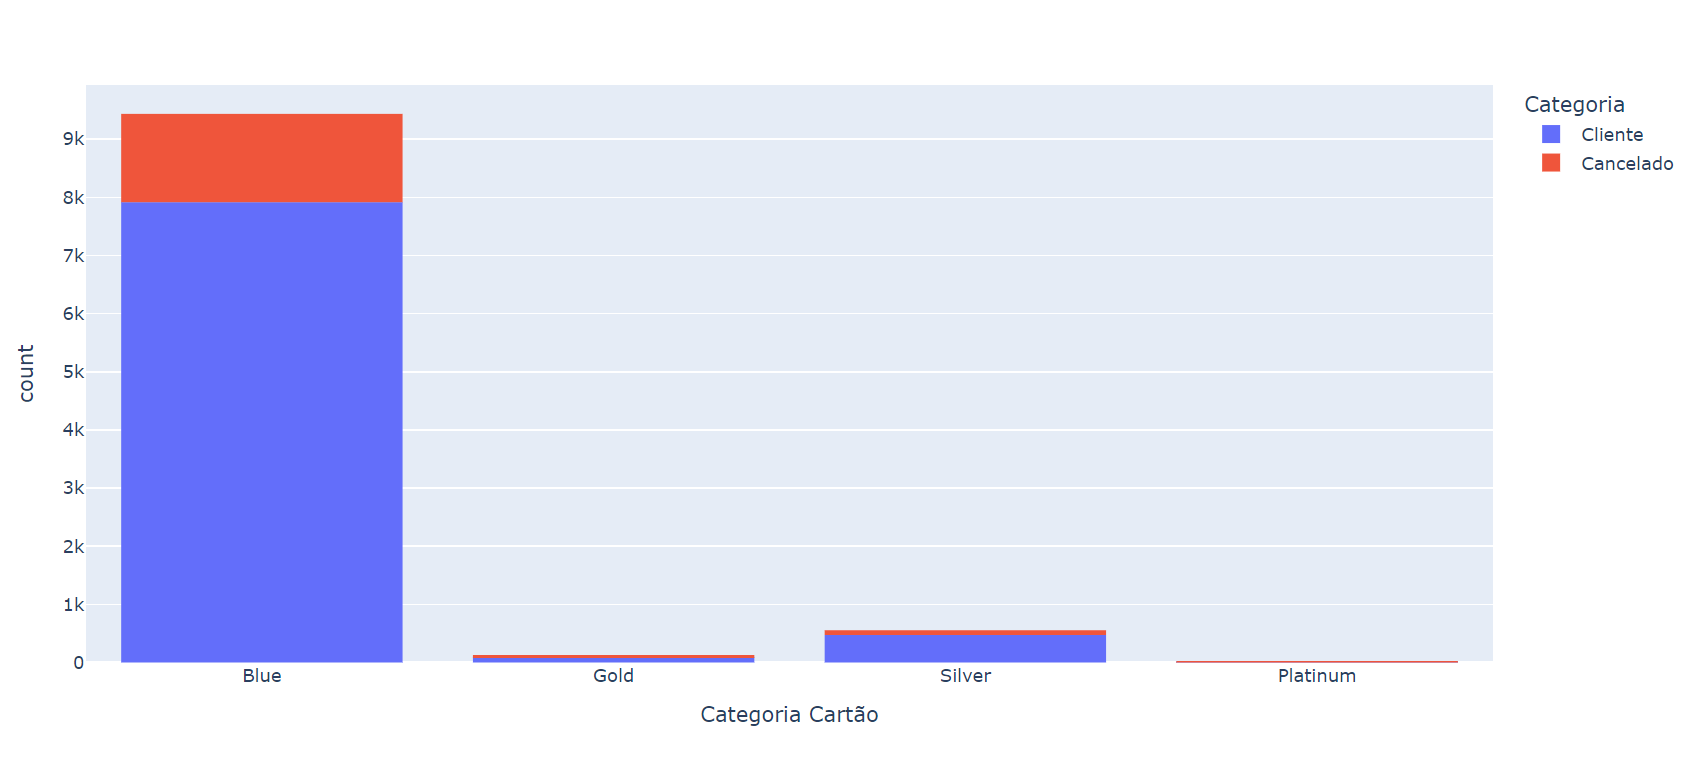

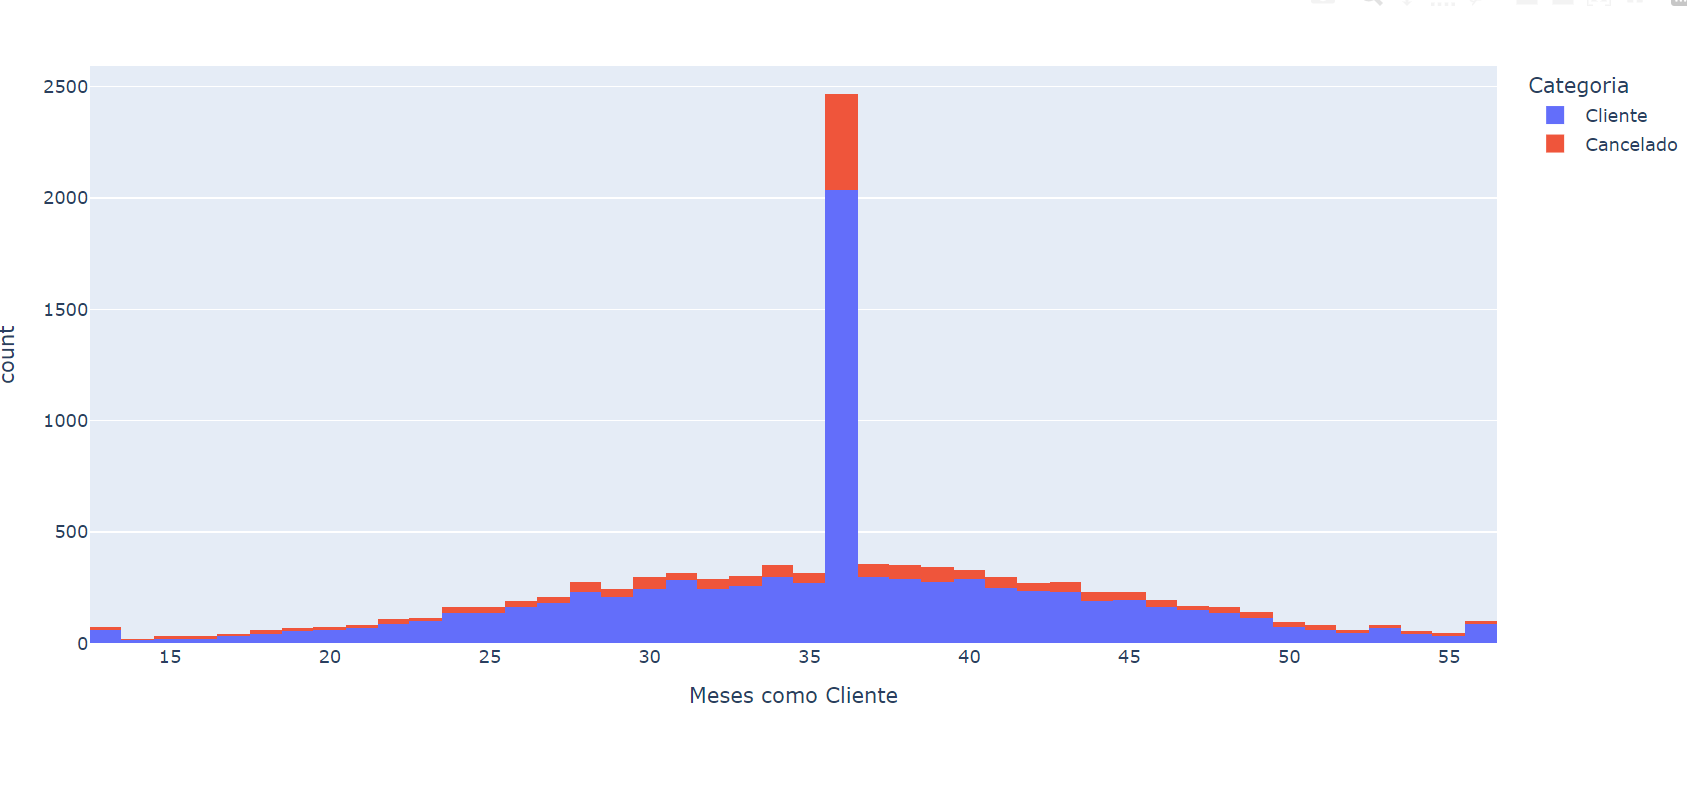

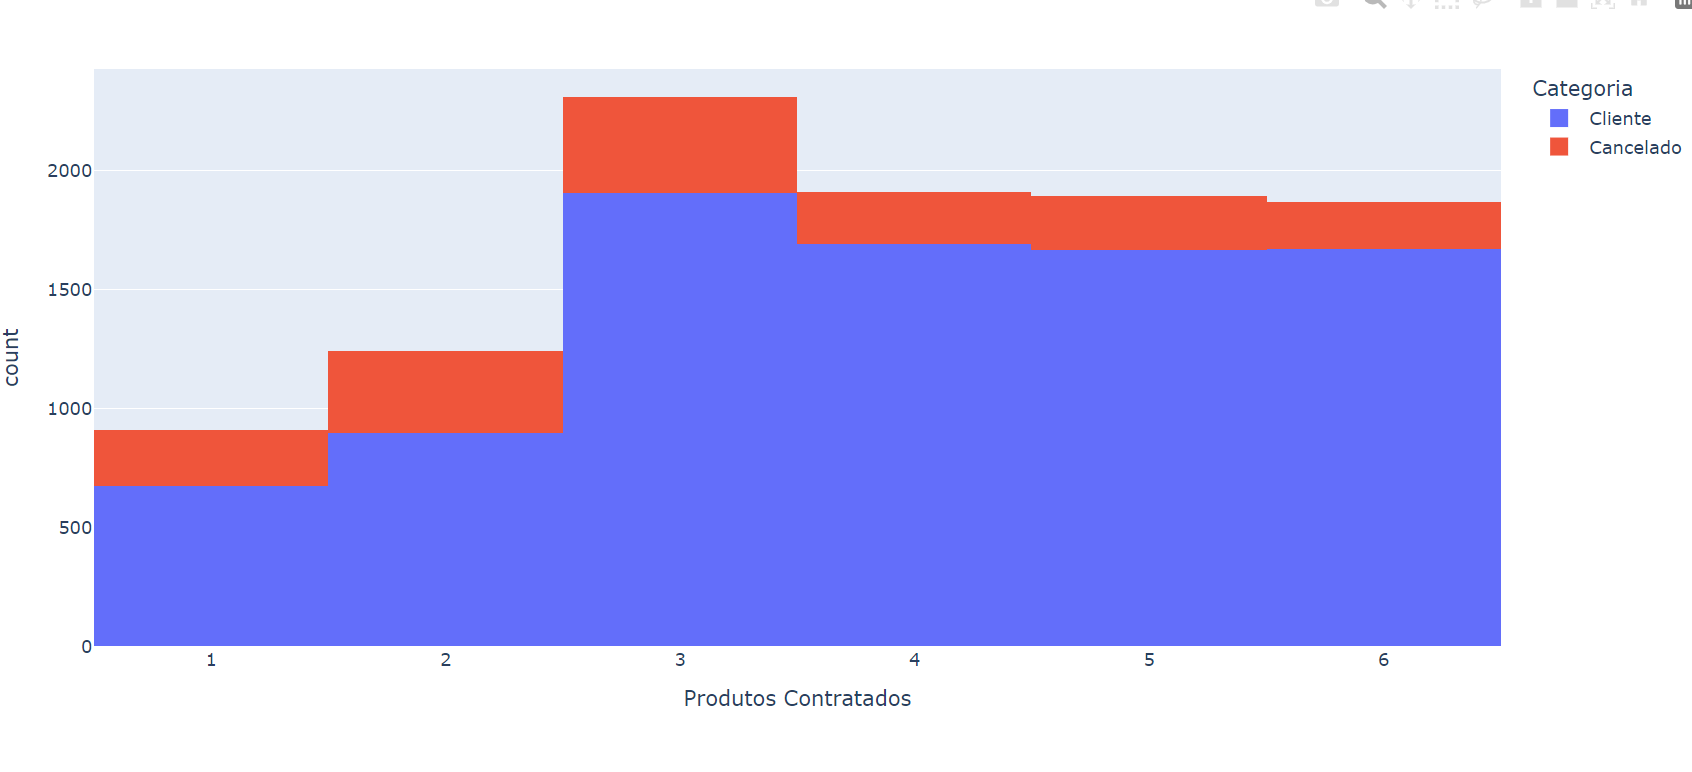

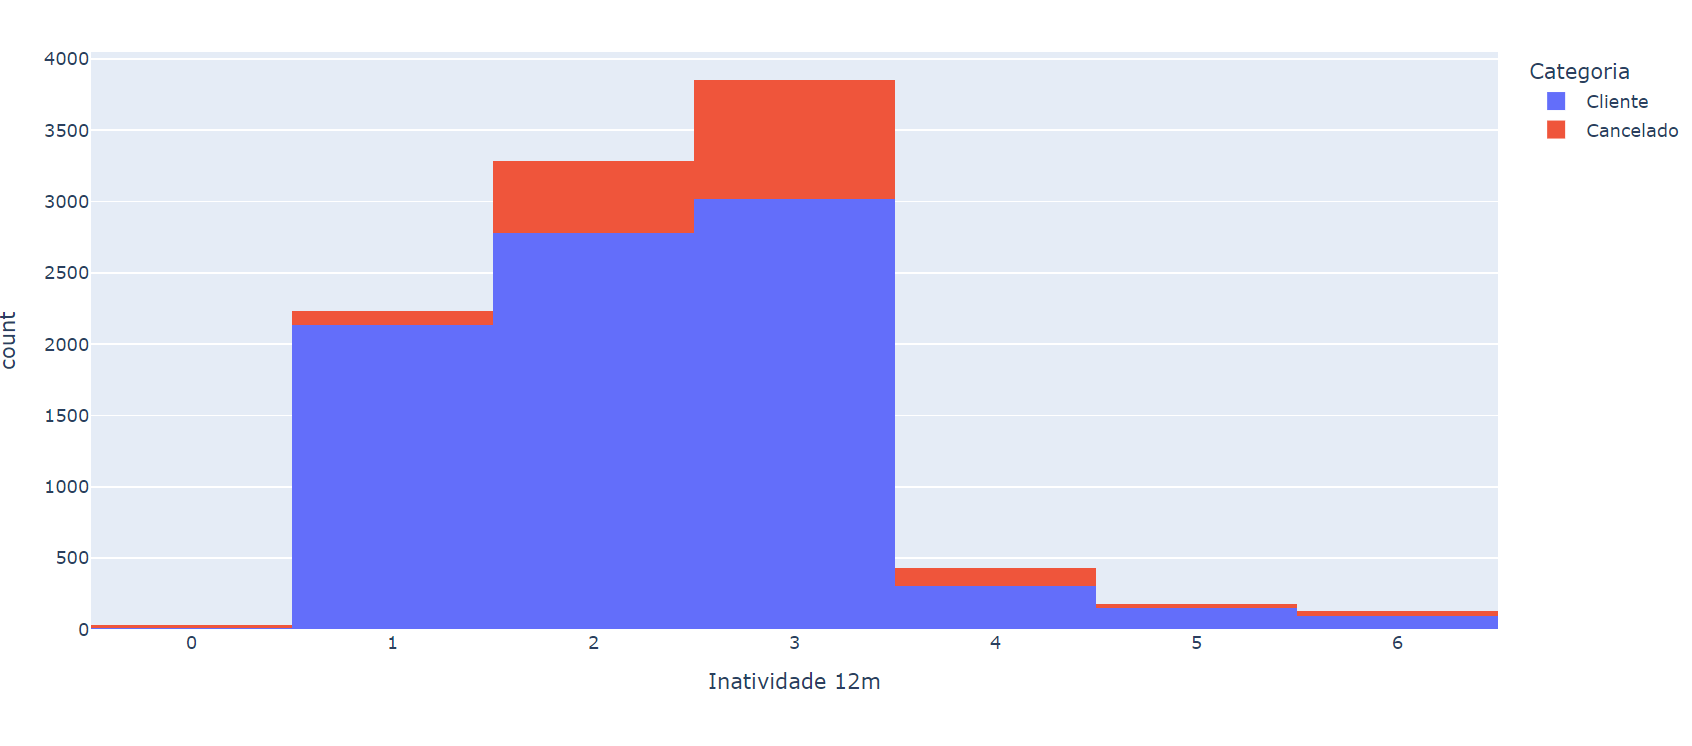

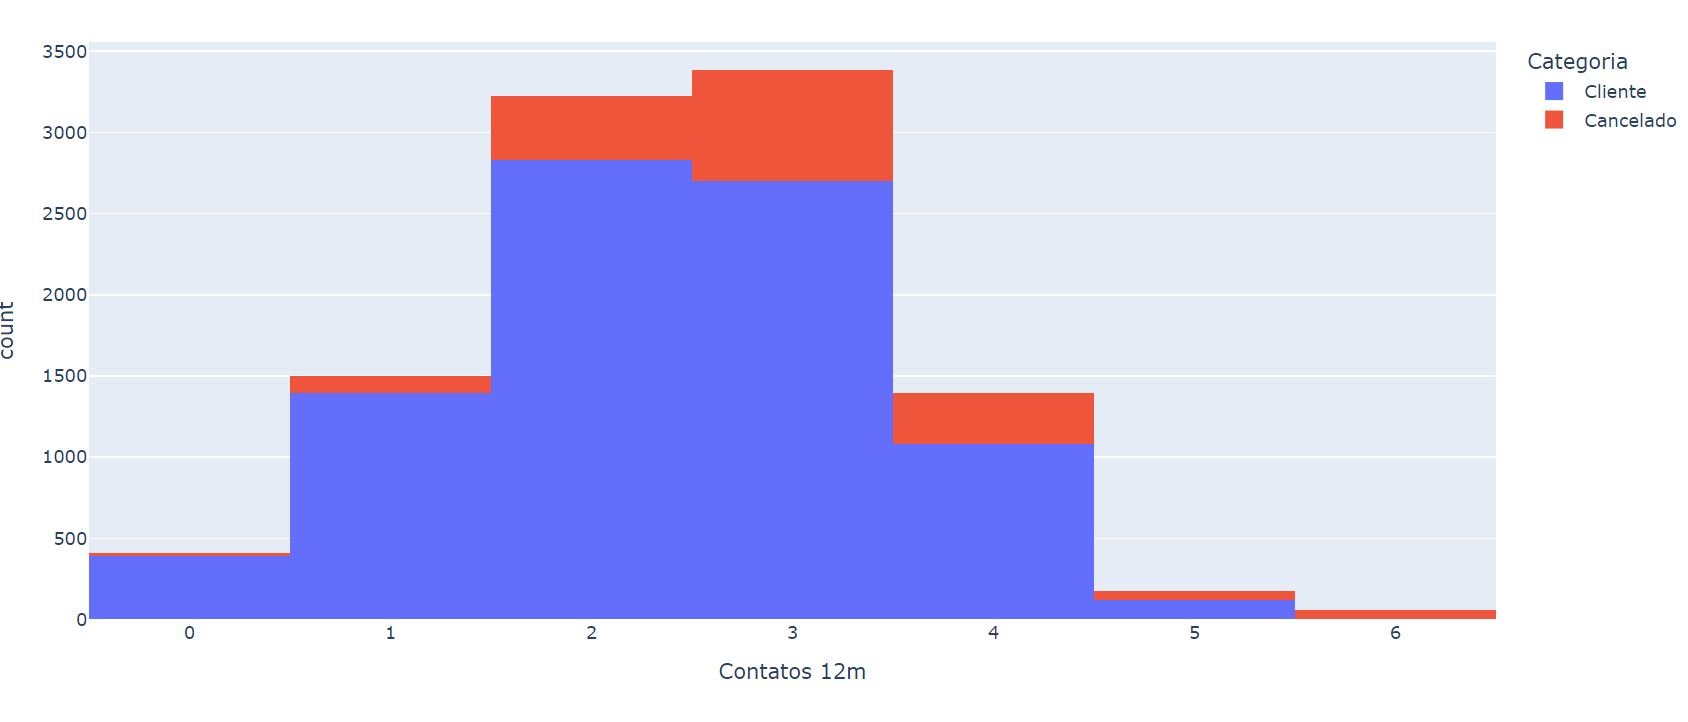

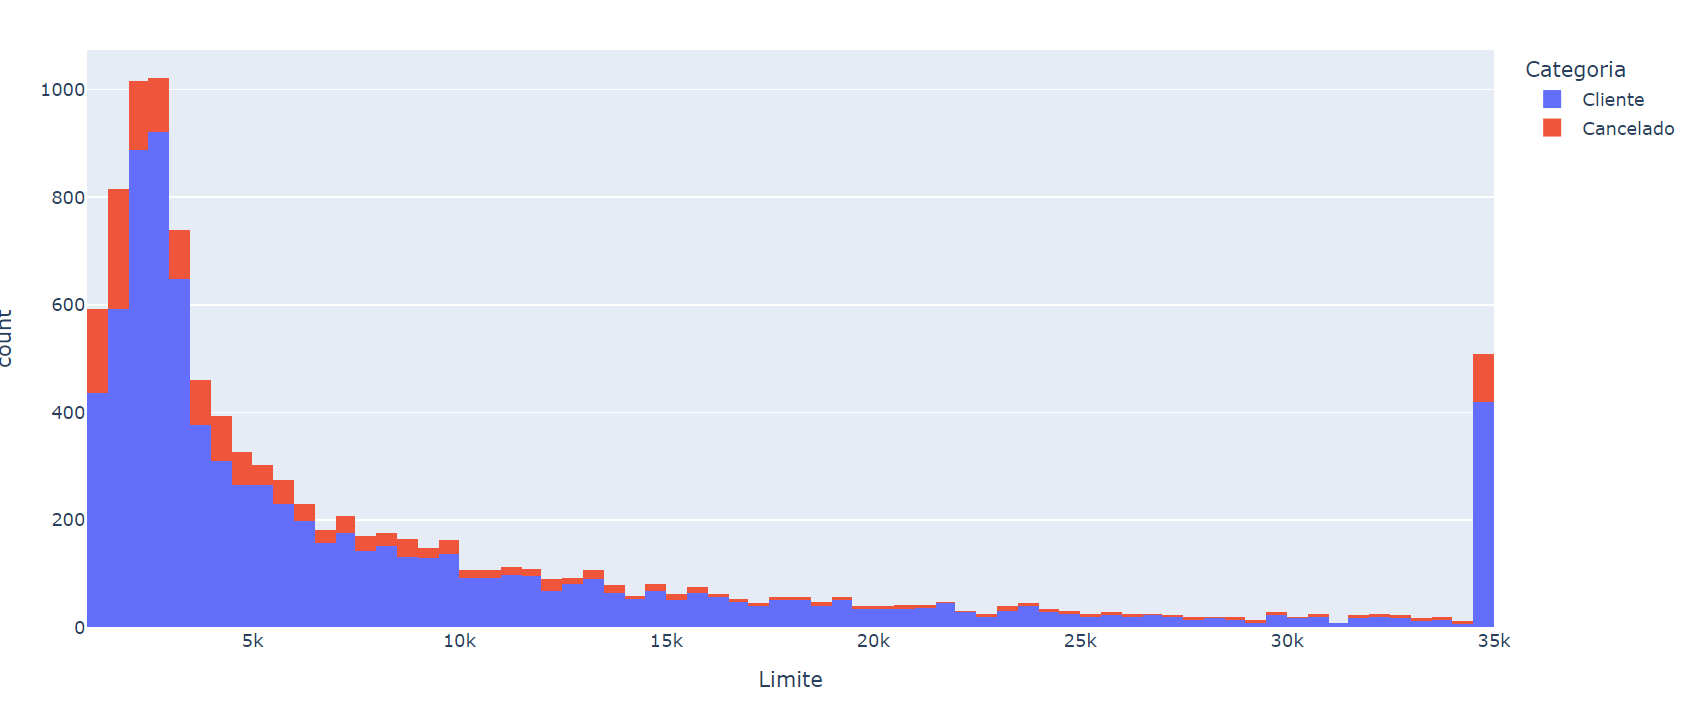

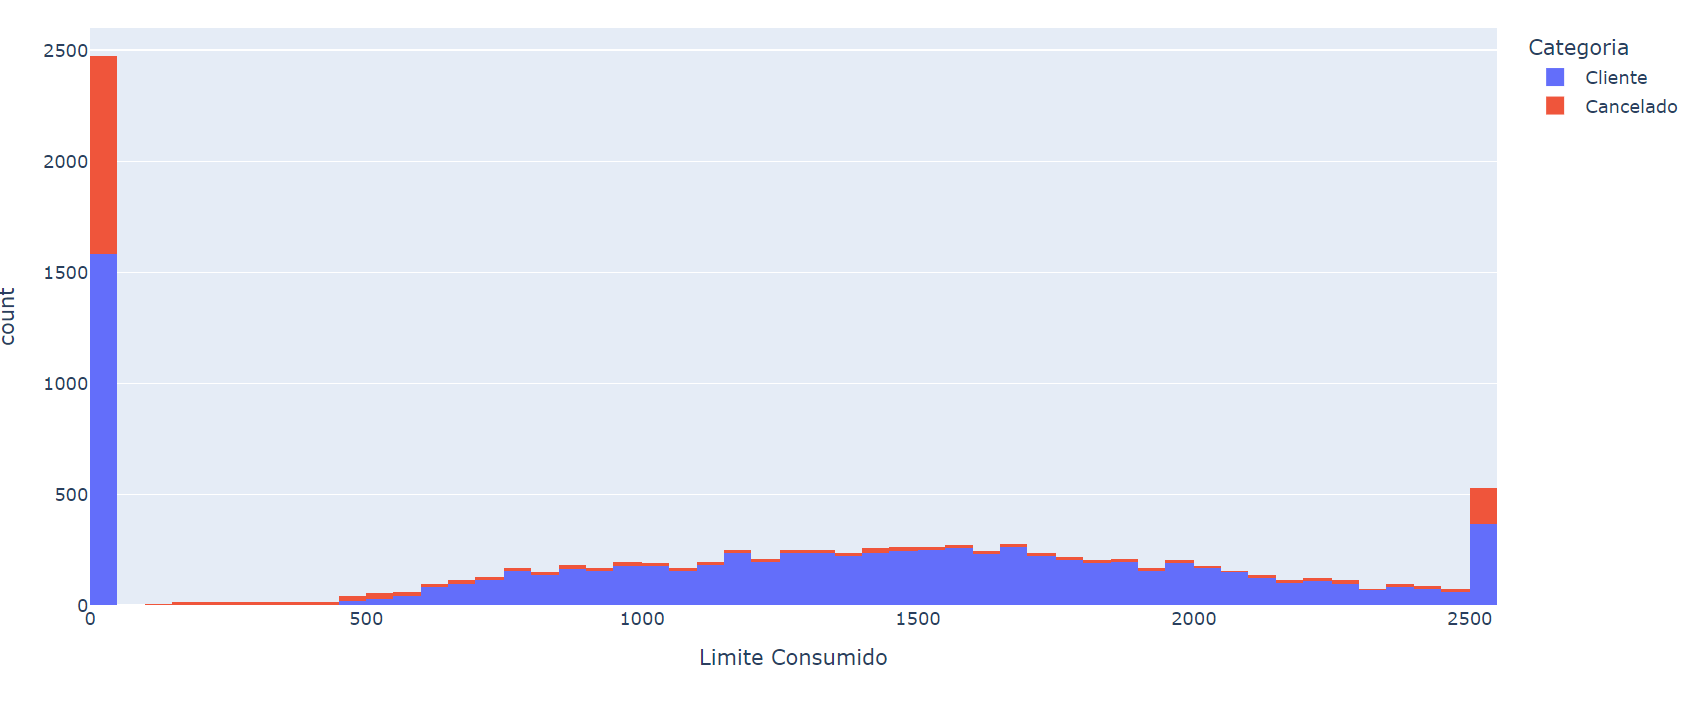

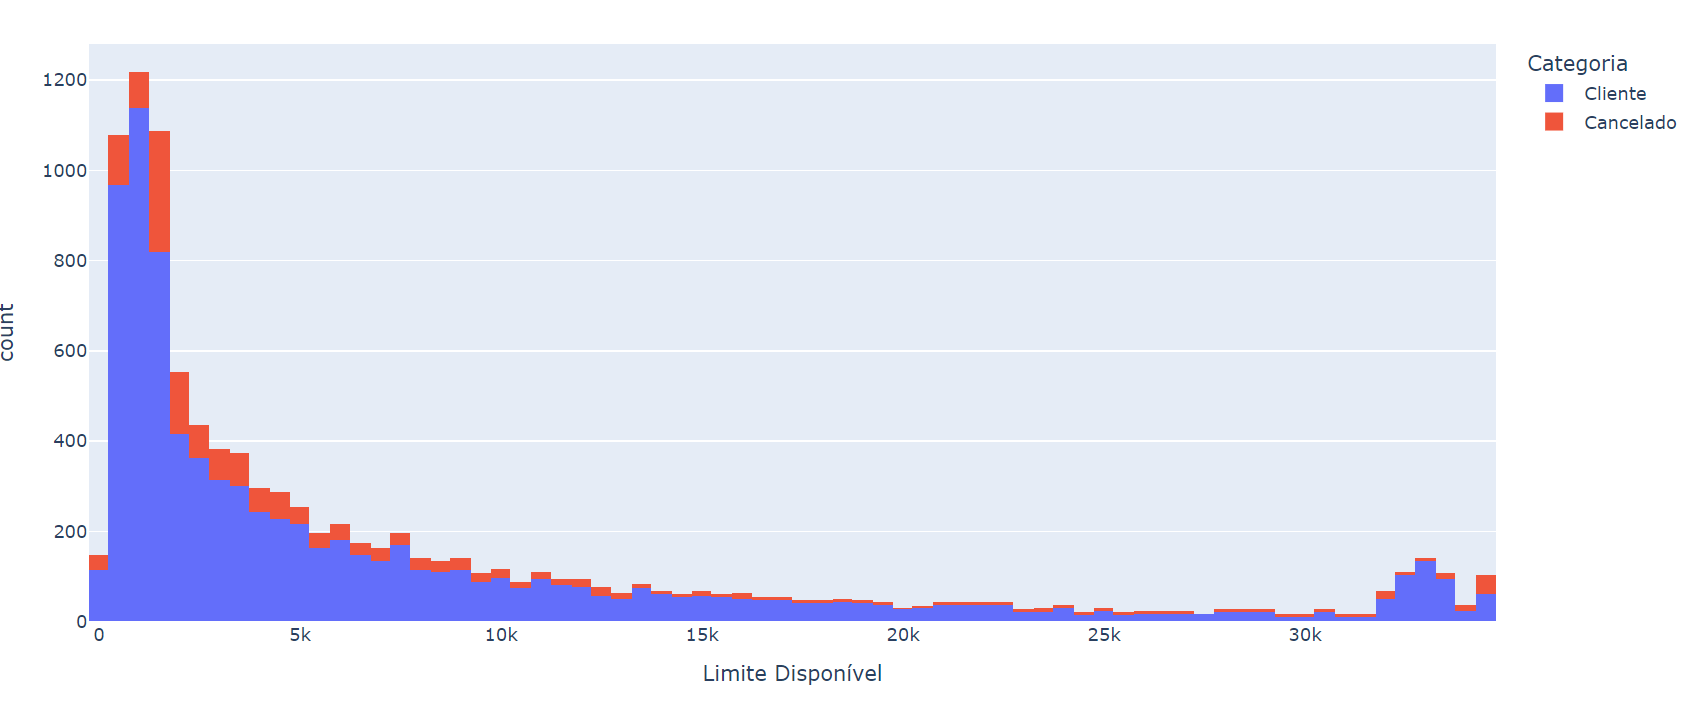

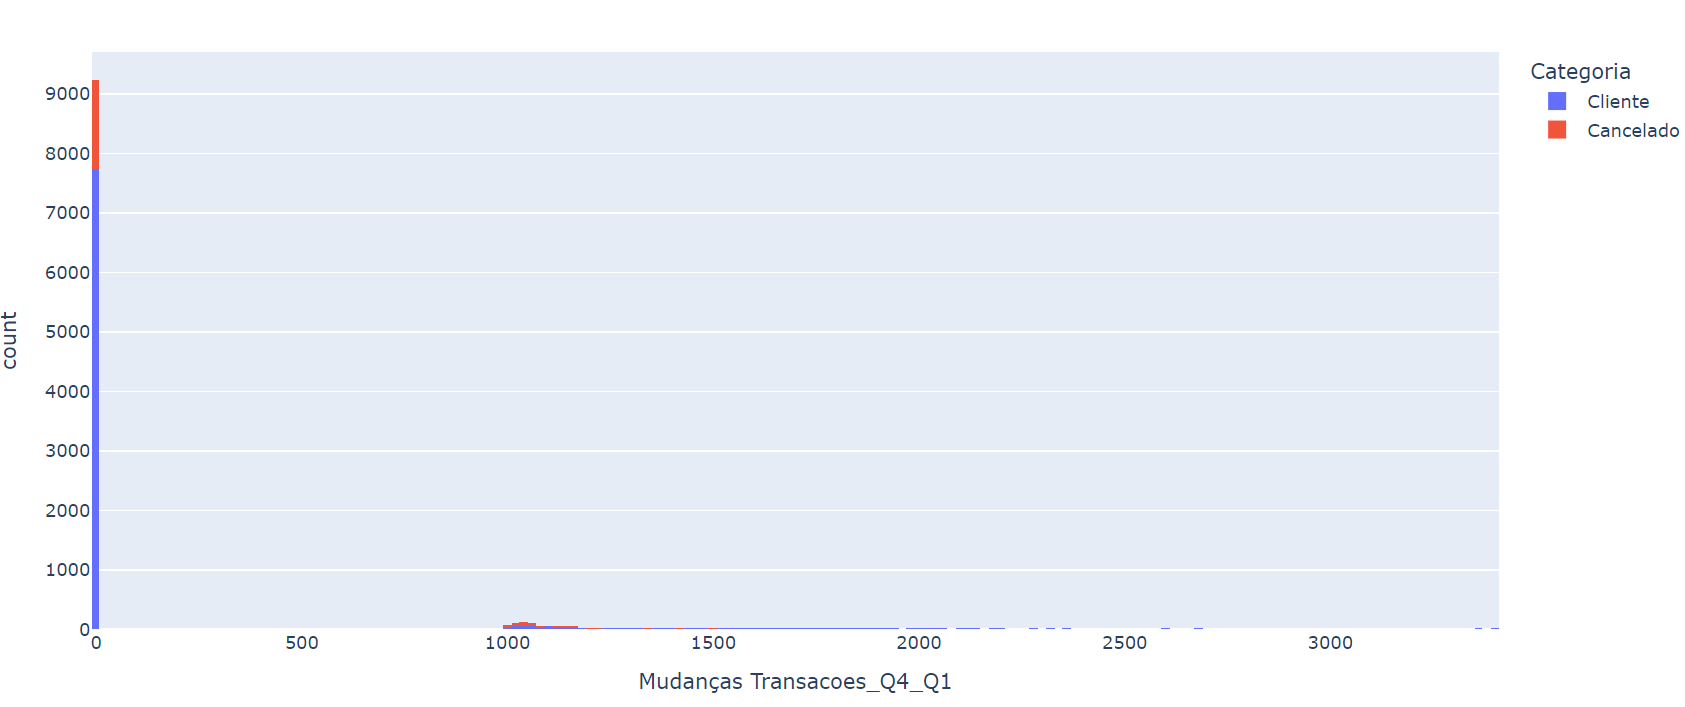

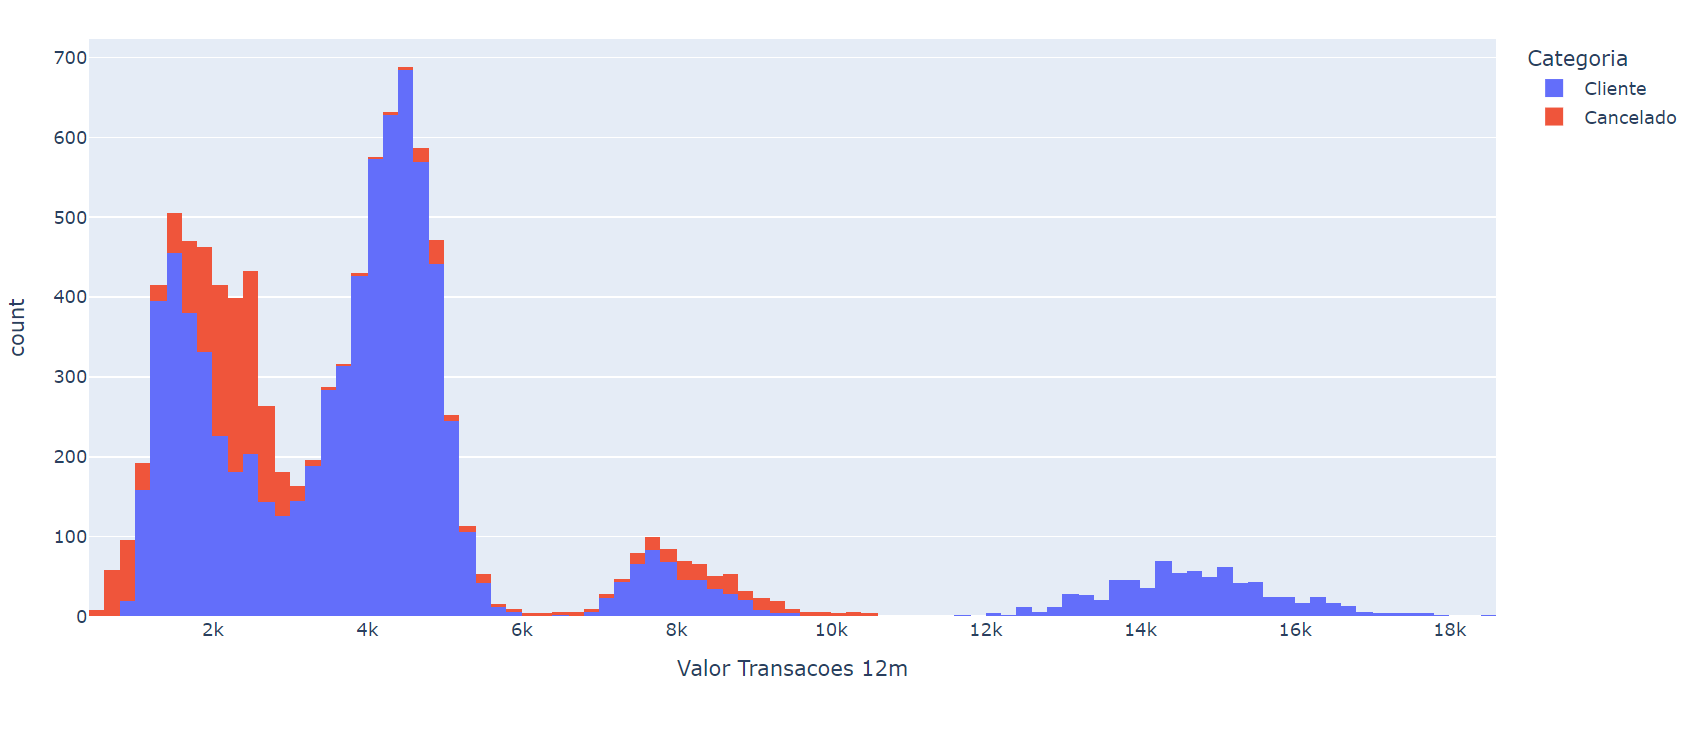

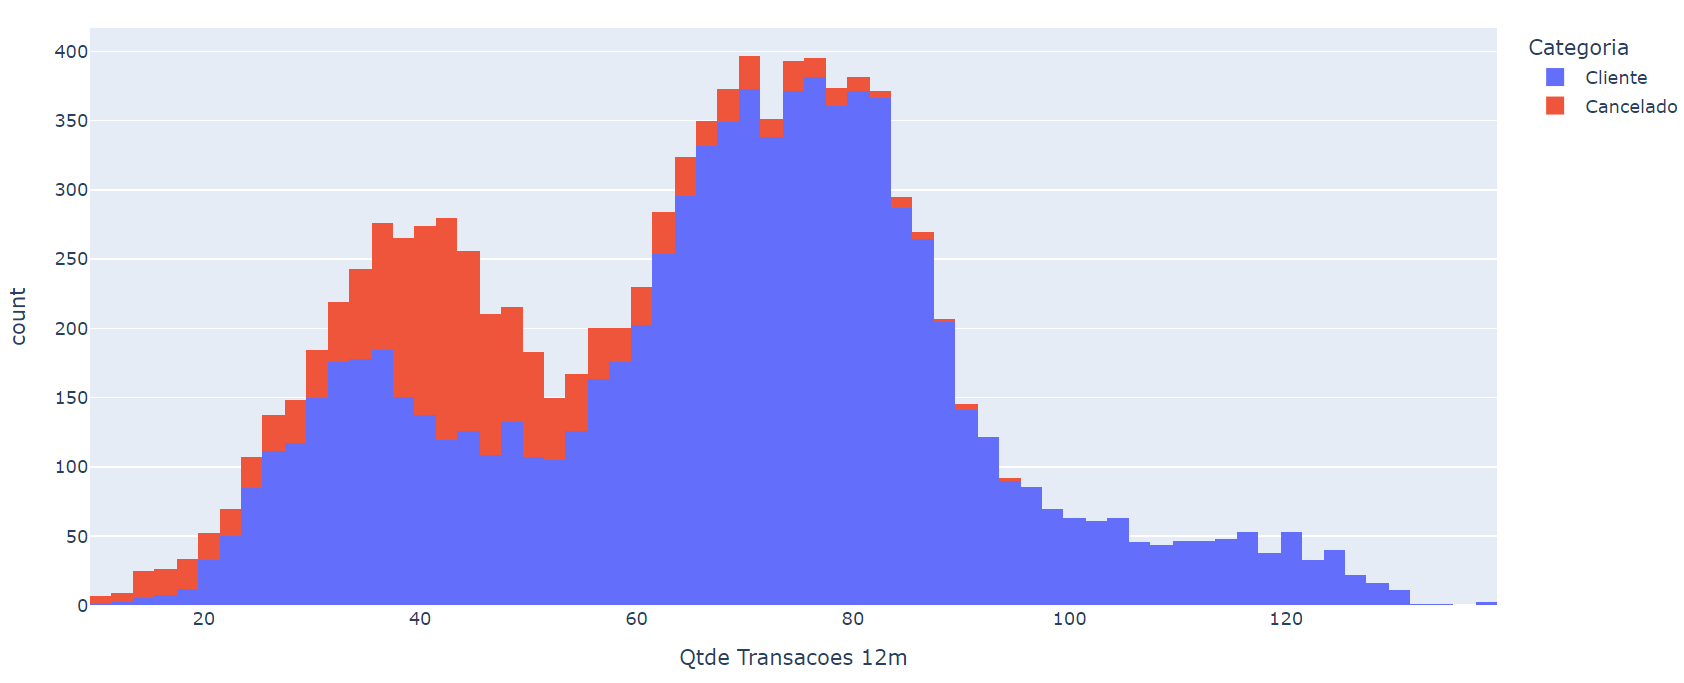

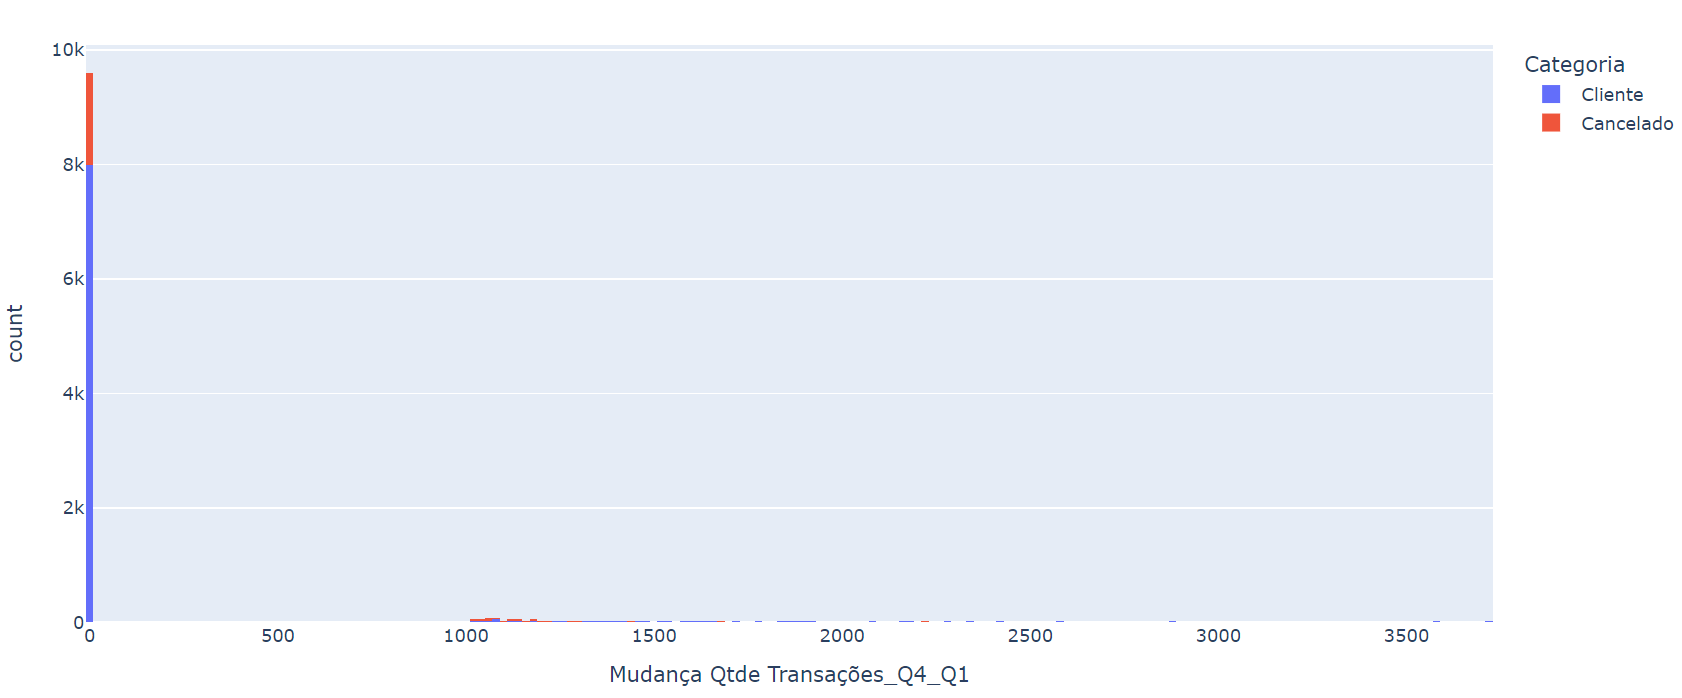

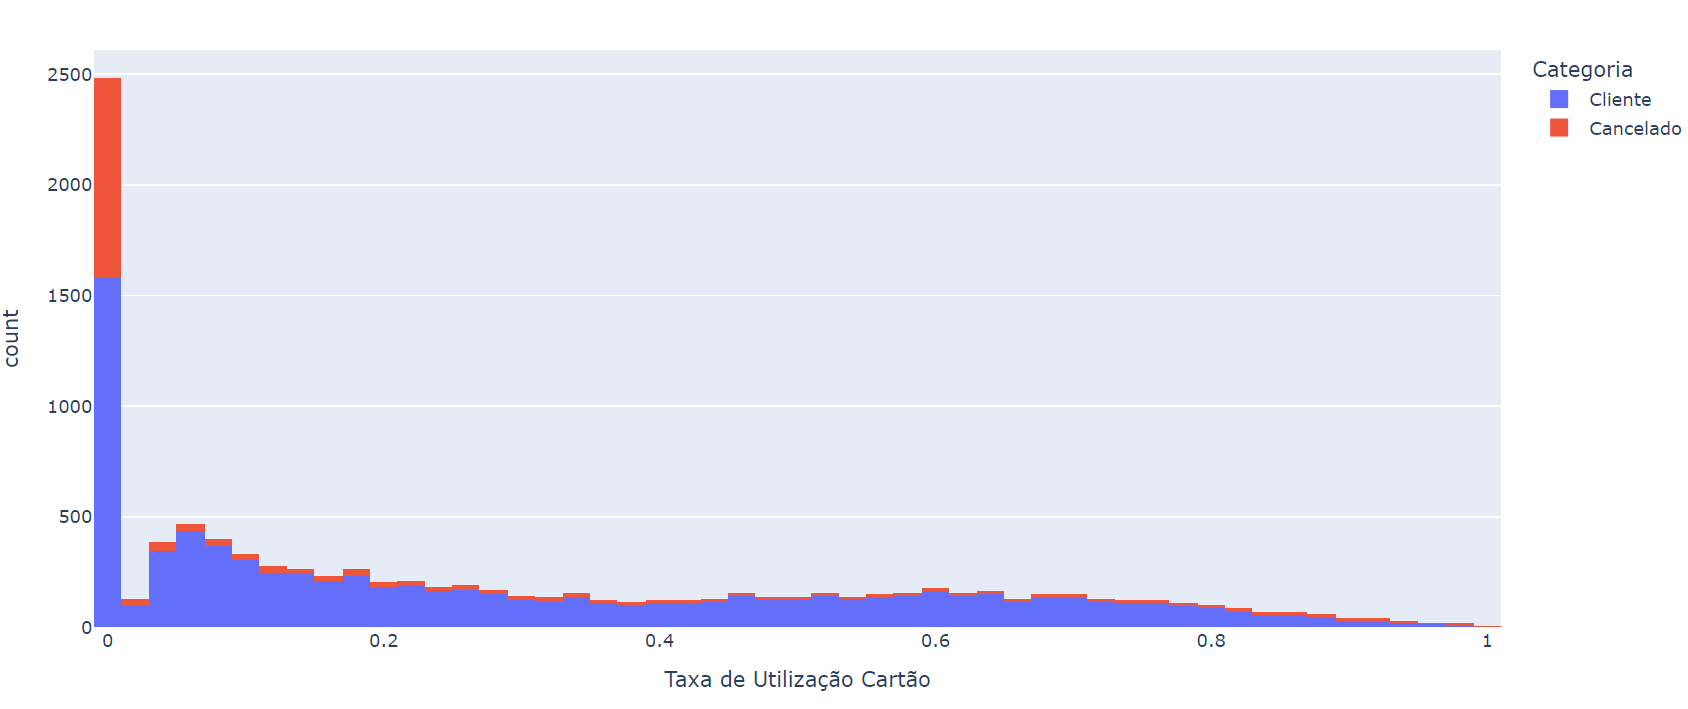

#Informações retiradas da análise
- Parece que quanto menor o número de produtos contratados, maior a chance do cliente cancelar o cartão.
- Quanto menos o cliente usa o cartão, maior a chance dele cancelar
- Quanto menores os valores de transações, mais propenso o cliente esta à cancelar
- Quanto mais vezes o cliente entra em contato, maior a probabilidade dele cancelar